___

<a href='http://www.pieriandata.com'></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Cравнительный анализ различных методов регрессии!

## Данные

Вас только что наняла на работу буровая компания, которая применяет рентгеновские лучи для определения плотности камня. Задача в том, чтобы вовремя менять буровые головки прежде, чем переходить к бурению камня!

![image]<img src='boring.jpg' height=200>

Компания представила Вам результаты лабораторных тестов - в них измеряется отражённый сигнал, полученный сенсорами на разных частотах в герцах, для различной плотности камня. Оказалось, что если отобразить эти результаты на графике, то мы получим синусоиду - с изменением плотности камня уровень отражённого сигнала меняется волнообразно...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

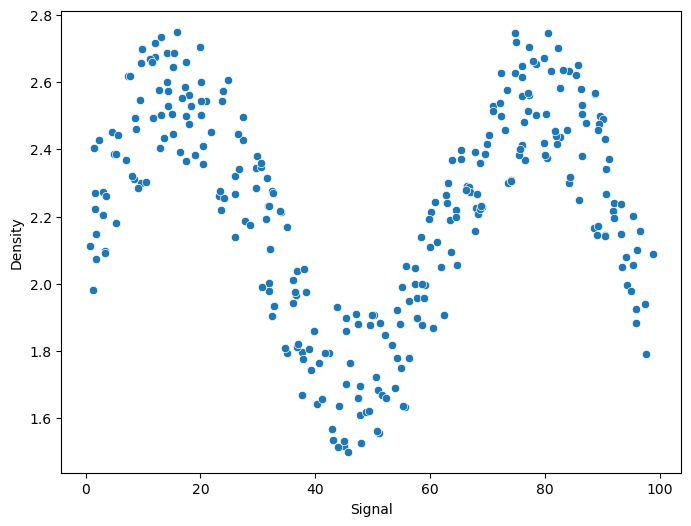

In [7]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Разбиение данных на обучающий и тестовый наборы 

Разбиение нужно для последующей оценки модели на тестовом наборе данных.

In [14]:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature
# Если у нас только 1 признак, то у нас не дата фрейм, а обЬект сериес, следовательно, 
# его надо преобразовать в дата фрейм.
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Линейная регрессия

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [23]:
lr_preds = lr_model.predict(X_test)

In [26]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

что-то не так...

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

Как выглядит эта линия?

In [27]:
signal_range = np.arange(0,100)

In [28]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

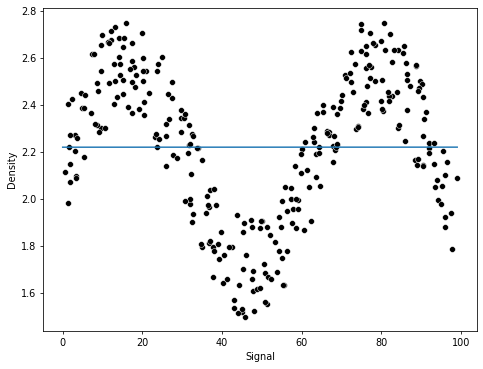

In [29]:
plt.figure(figsize=(8,6),dpi=70)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

Видно, что это не нормально, но если признаков много, то визуализировать результат работы модели нельзя. Тогда следует посмотреть на остатки.

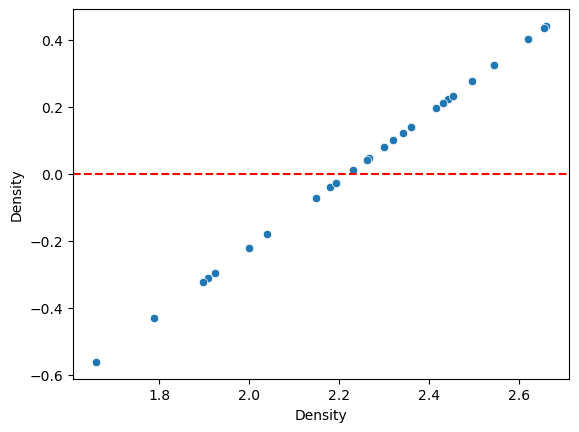

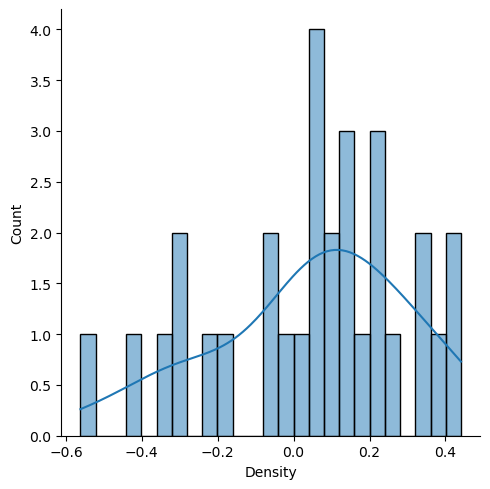

In [30]:
# ______Анализ остатков __________________________
test_residuals = y_test - lr_preds
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, color='red', ls='--')
sns.displot(test_residuals, bins=25, kde=True)
# plt.show()

Видно, что ошибки имеют закономерности, а должны быть случайными. Можно сравнить с нормальным распределением.

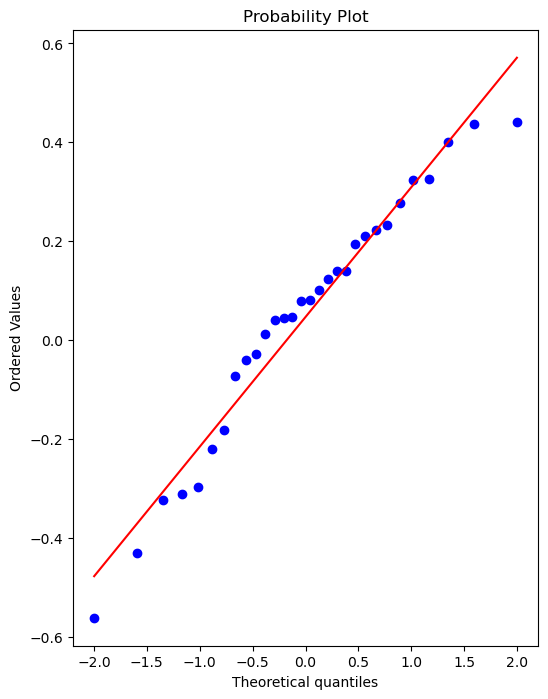

In [31]:
# __________ Сравниваем с идеальным нормальным распределением
import scipy as sp 
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_residuals,plot=ax)

Увы, близко к нормальнму закону.Т.ч. - смотрим на первый график...

---

# Полиномиальная регрессия

### Вспомогательная функция для запуска моделей

In [50]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE : {np.around(mae, 3)}')
    print(f'RMSE : {np.around(rmse, 3)}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

## Lirear model

MAE : 0.211
RMSE : 0.257


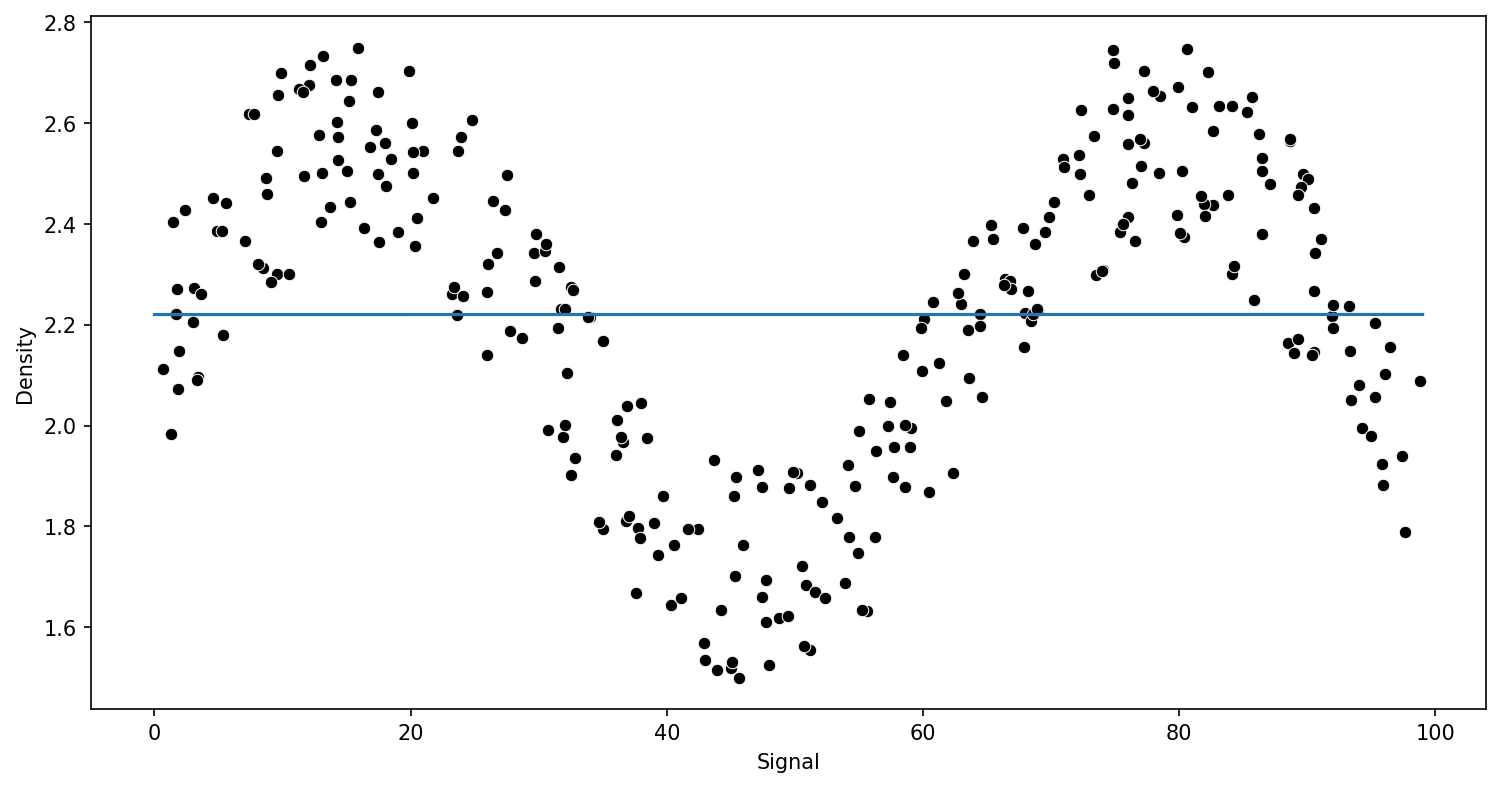

In [43]:
run_model(lr_model,X_train,y_train,X_test,y_test)

## Polynomial model

#### Пайплайн для степеней полинома

In [44]:
from sklearn.pipeline import make_pipeline

In [45]:
from sklearn.preprocessing import PolynomialFeatures

Далее нам надо выполнить 2 шага - создание полиномиальных признаков (PolynomialFeatures), которые мы и подаем на вход линейной регрессии. 

degrees = 2
MAE : 0.229
RMSE : 0.282
degrees = 3
MAE : 0.242
RMSE : 0.288
degrees = 4
MAE : 0.118
RMSE : 0.146


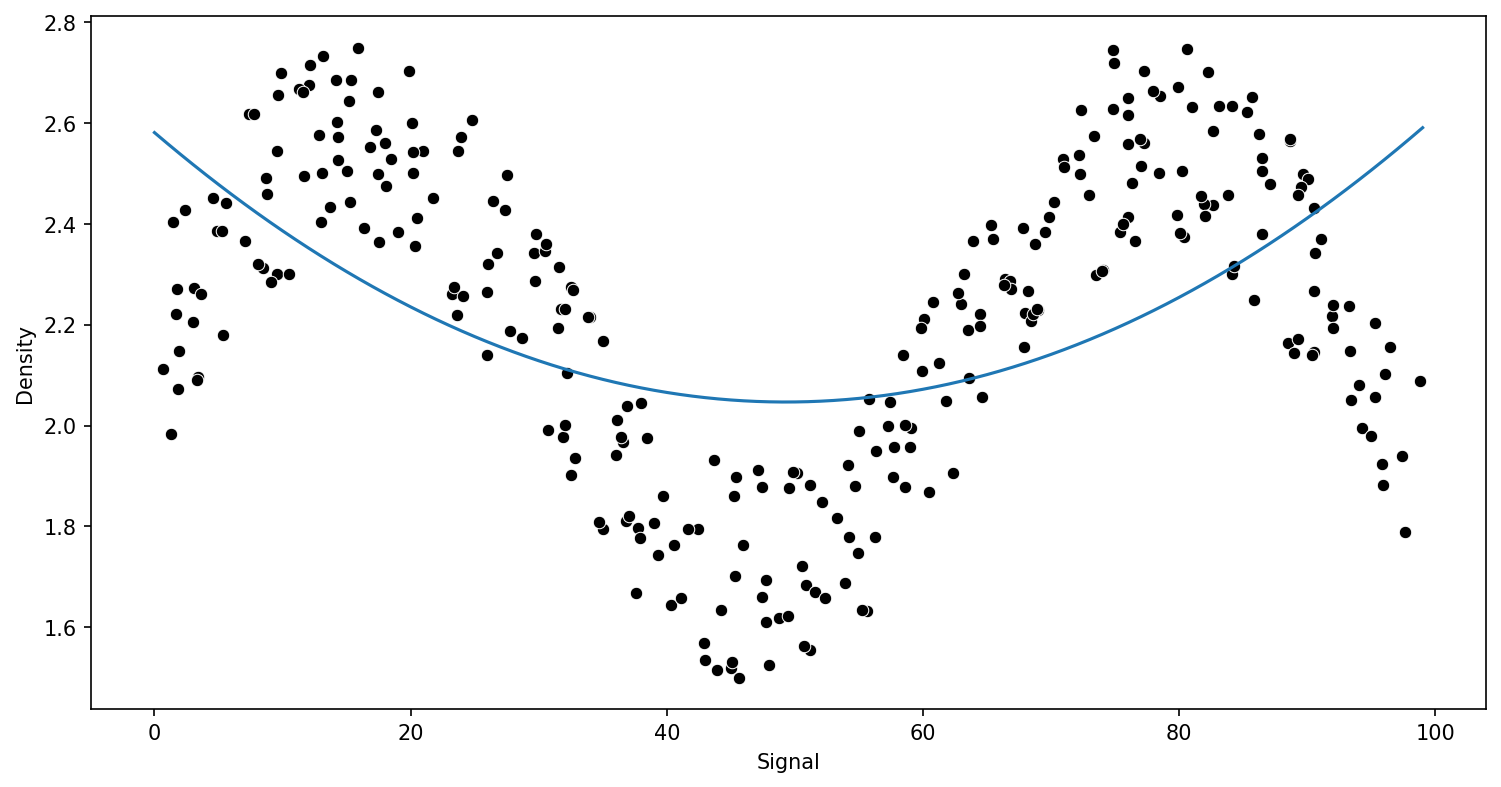

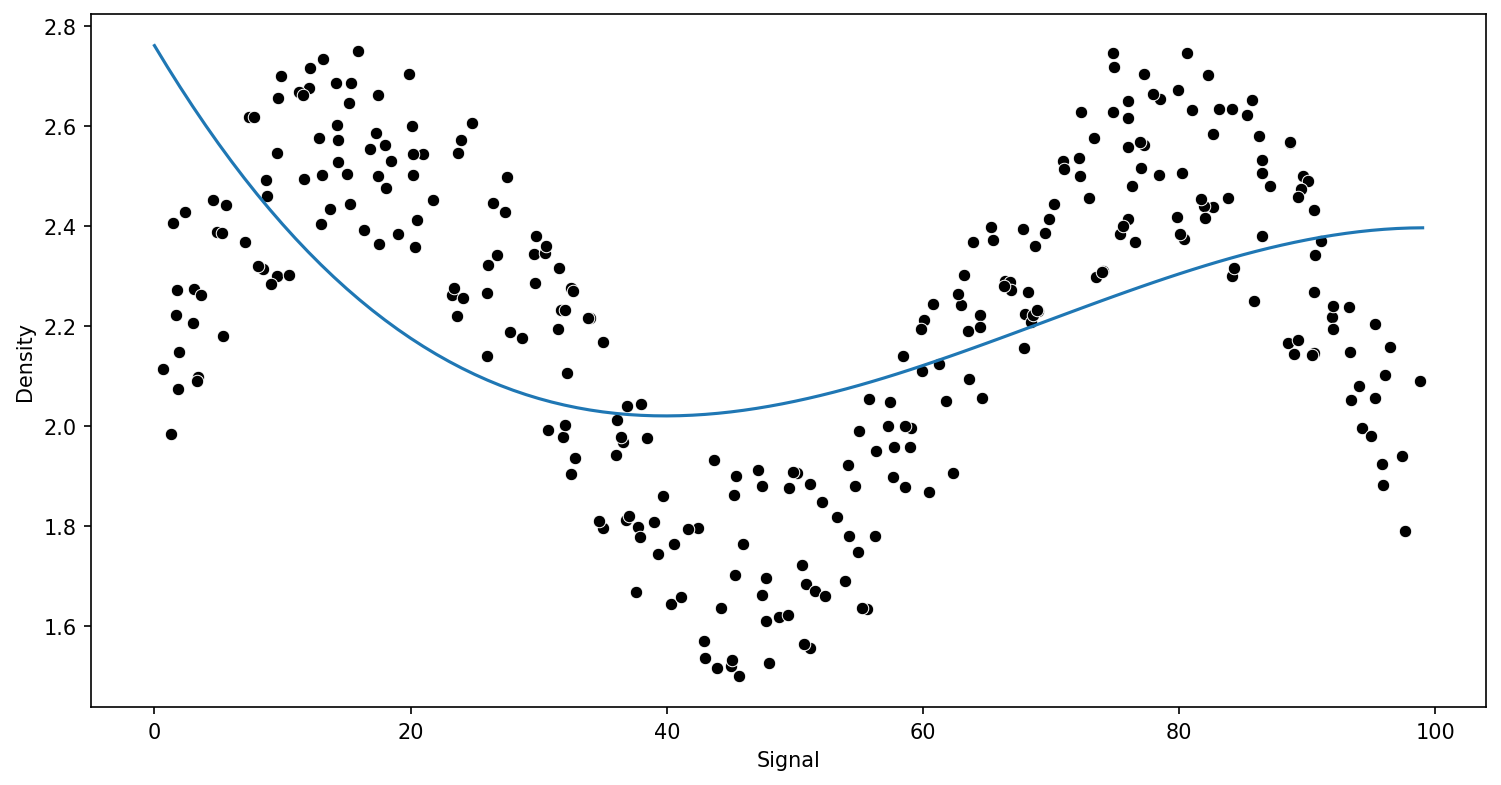

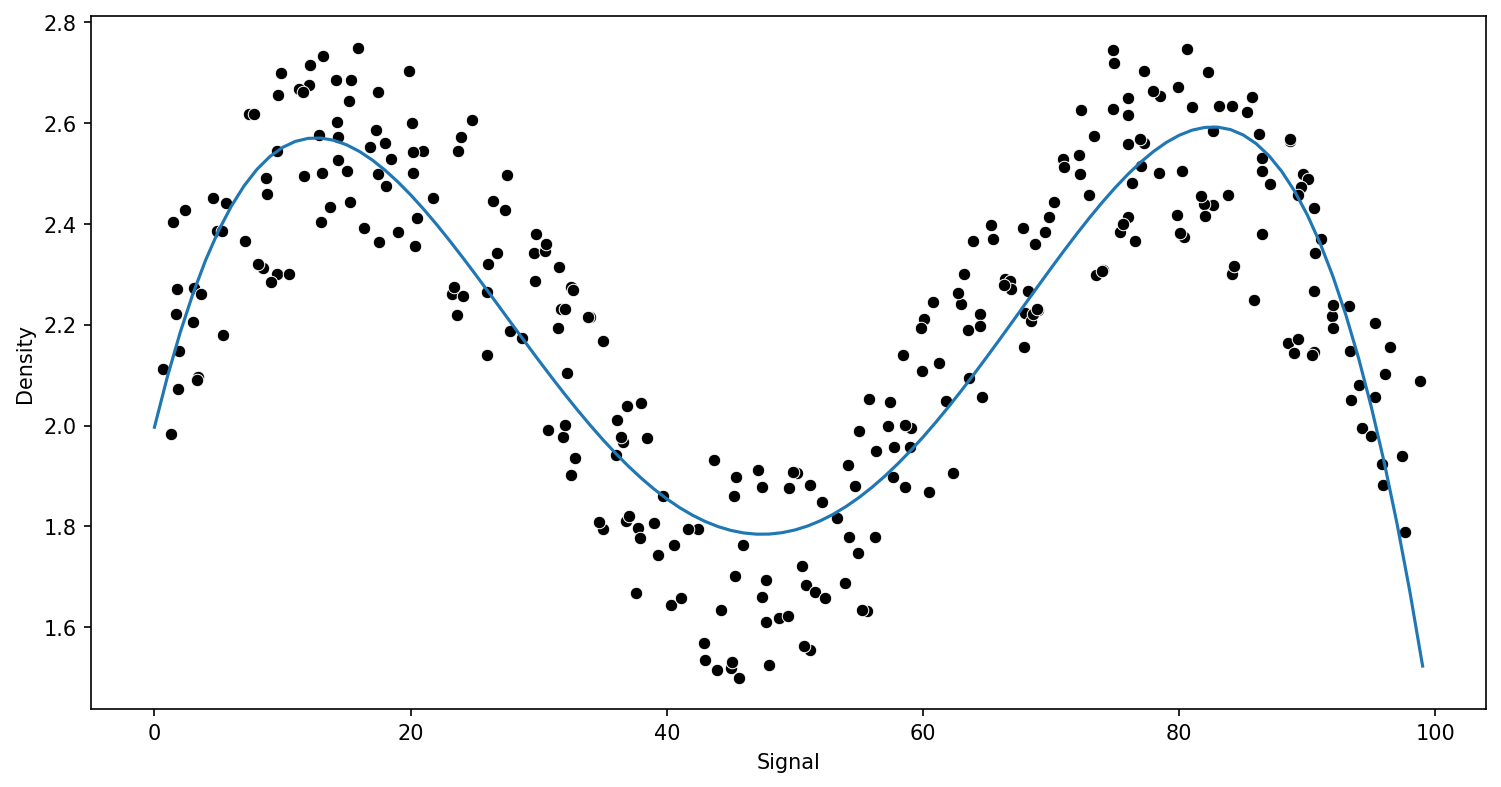

In [ ]:
# Сравнение моделей с различными степенями полинома
collection = [2,3,4]
for i in collection:
    pipe = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
    print(f'degrees = {i}')
    print("___________")
    run_model(pipe,X_train,y_train,X_test,y_test)

## Сравнение различных степеней полинома

RMSE : 0.1417947898442399


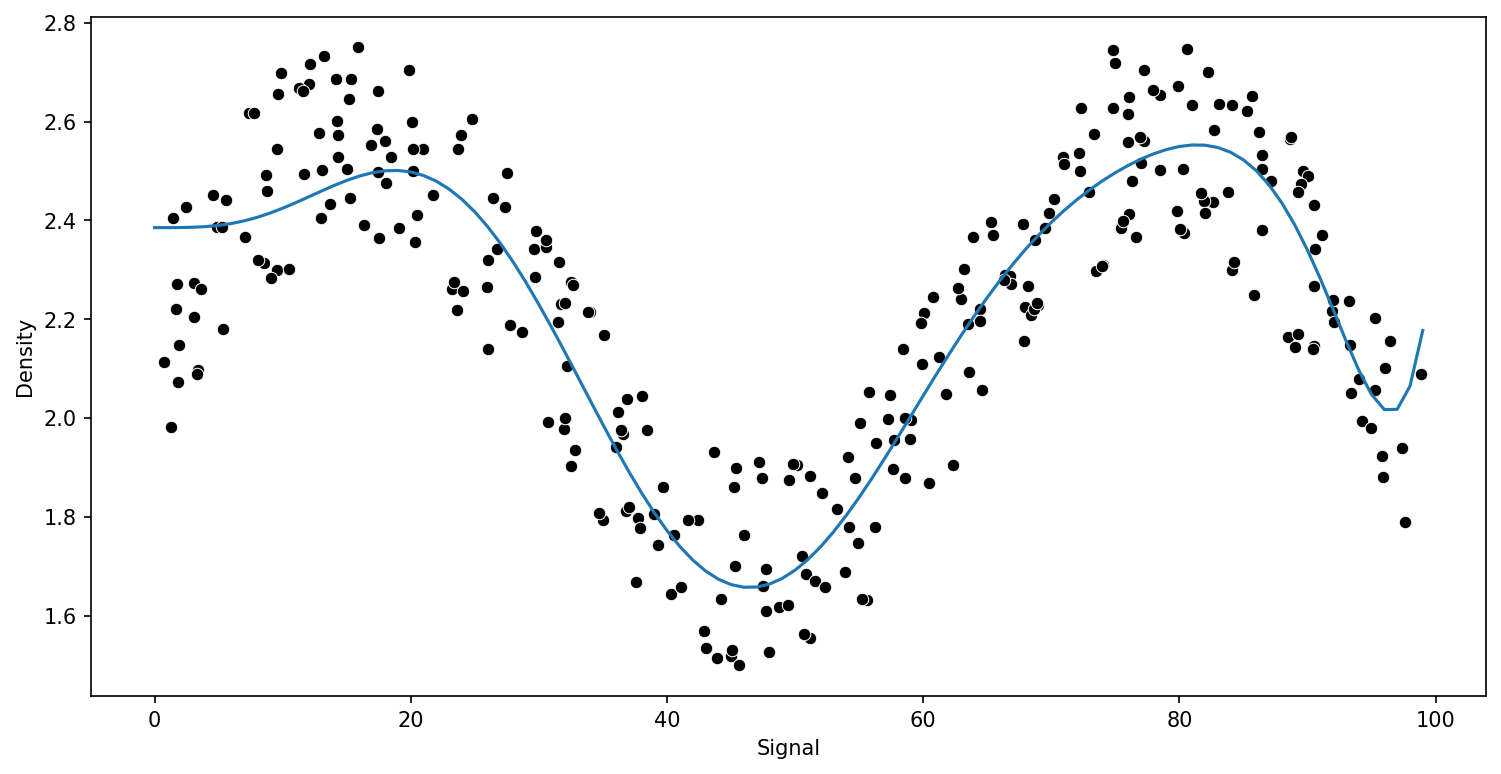

In [272]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## Регрессия KNN 

In [273]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


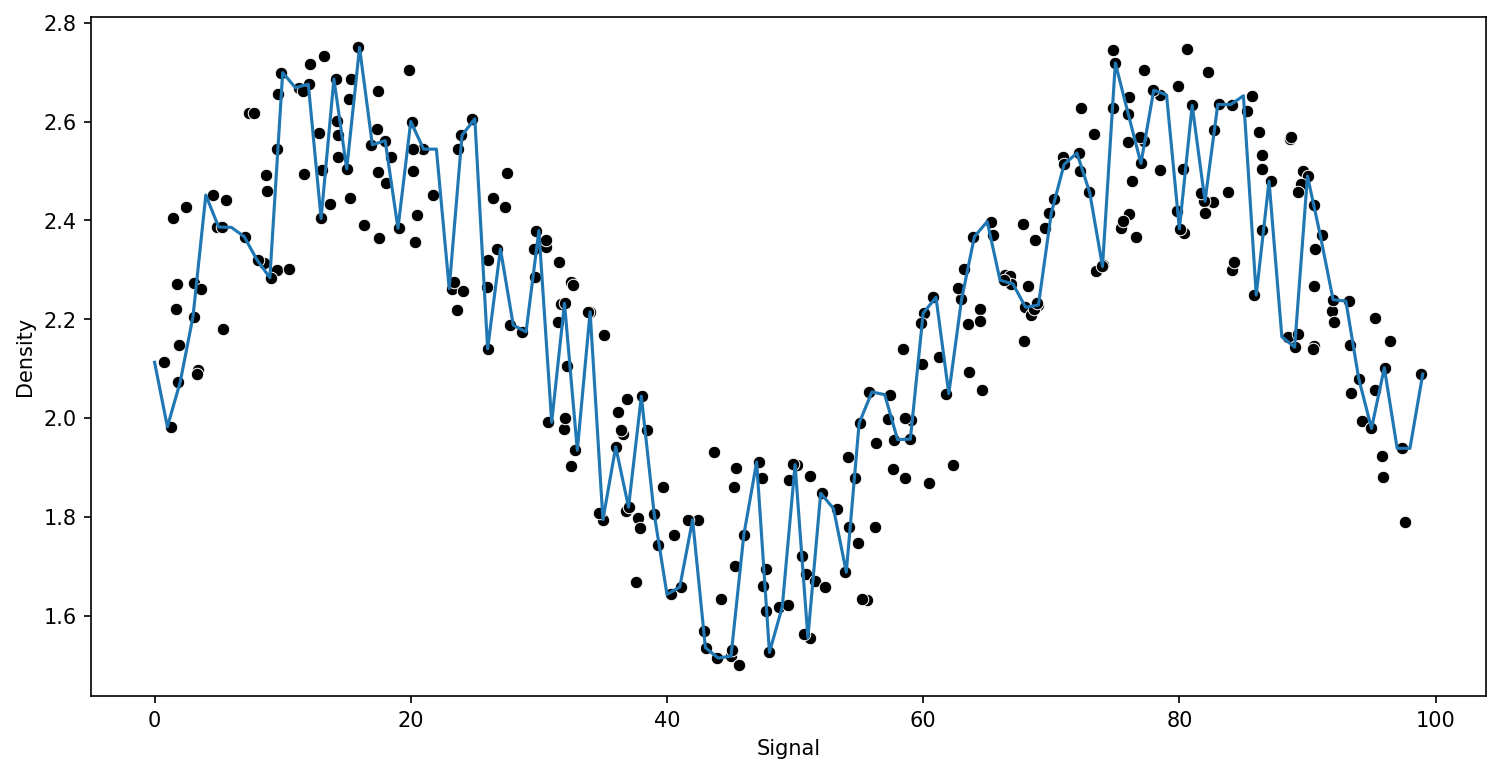

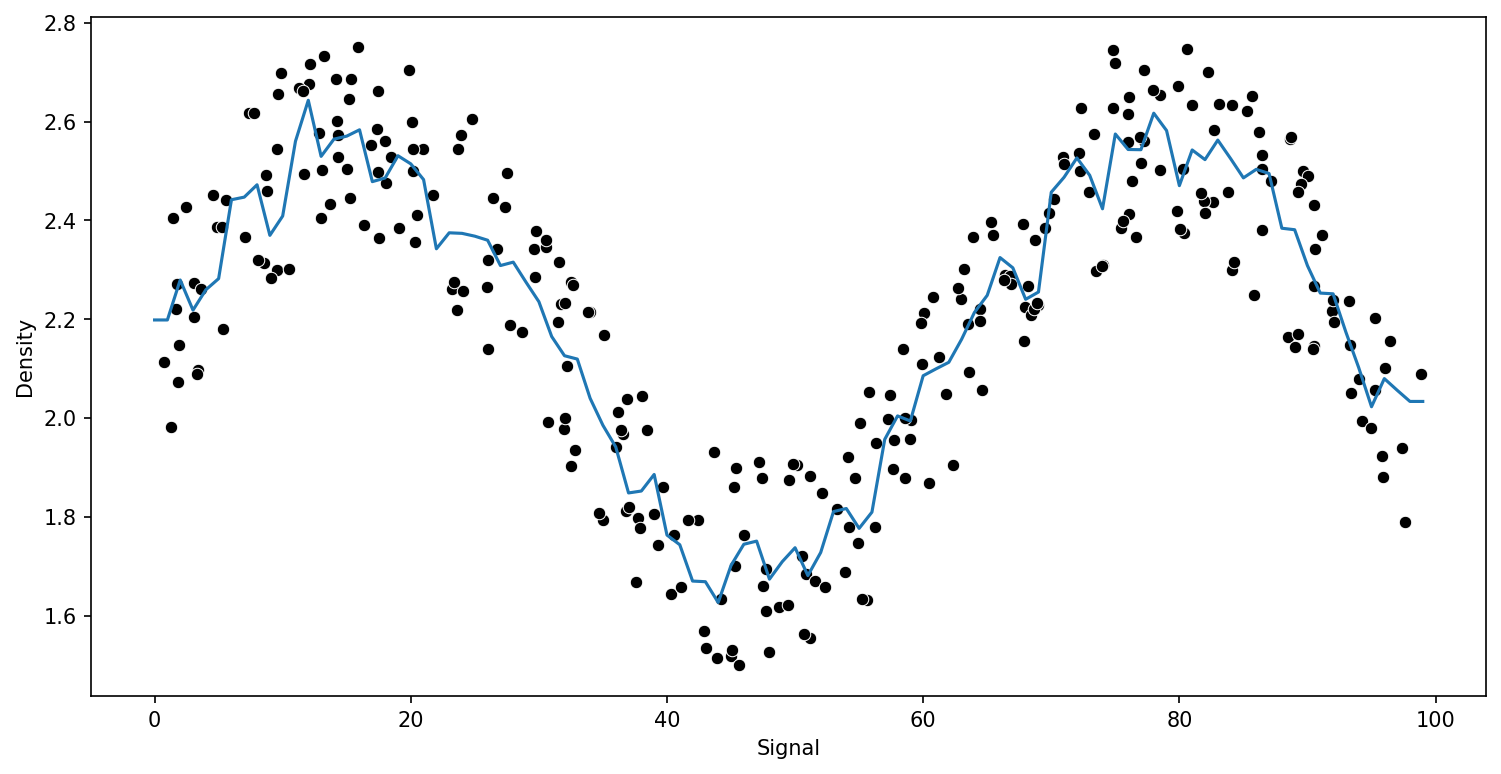

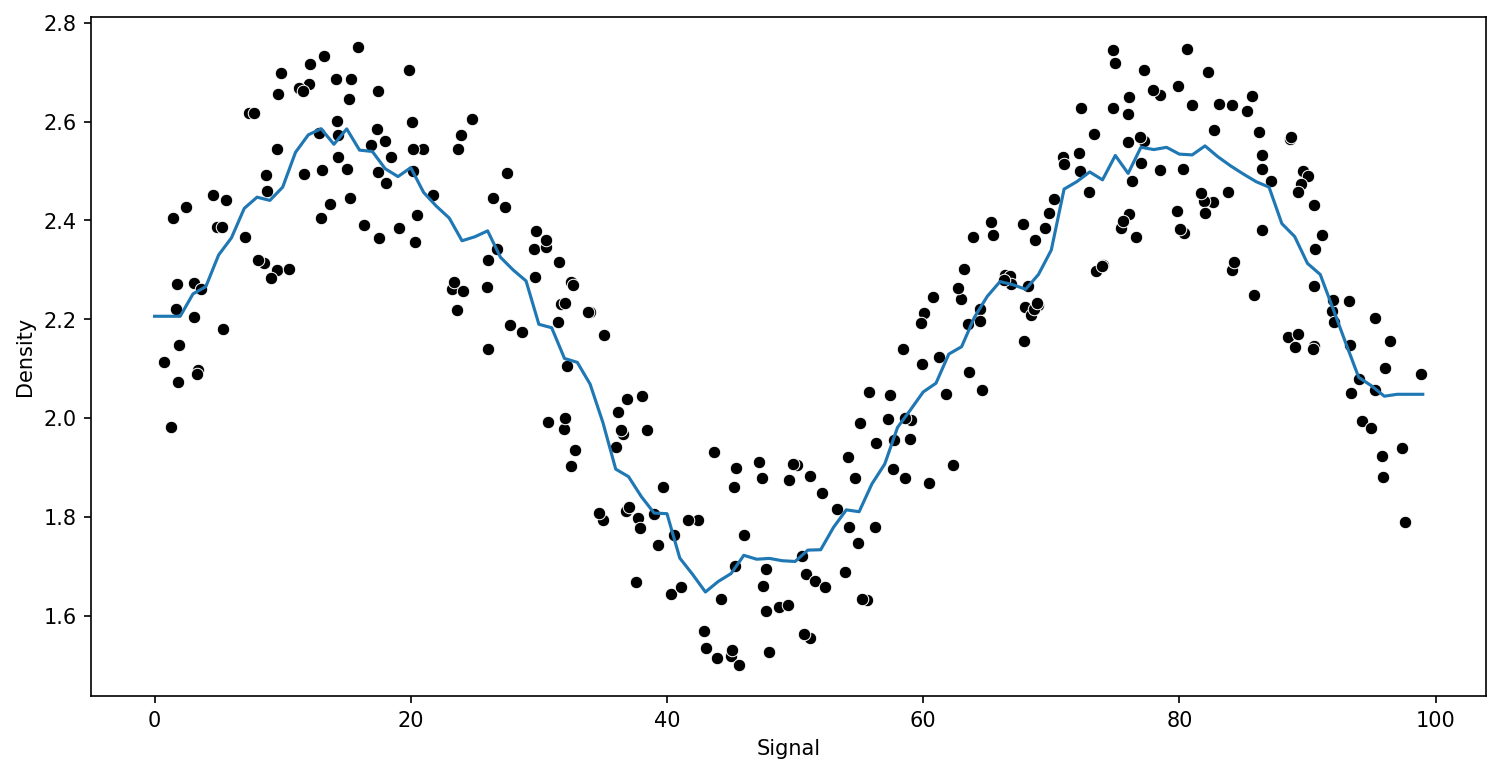

In [274]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Деревья решений для регрессии

In [275]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


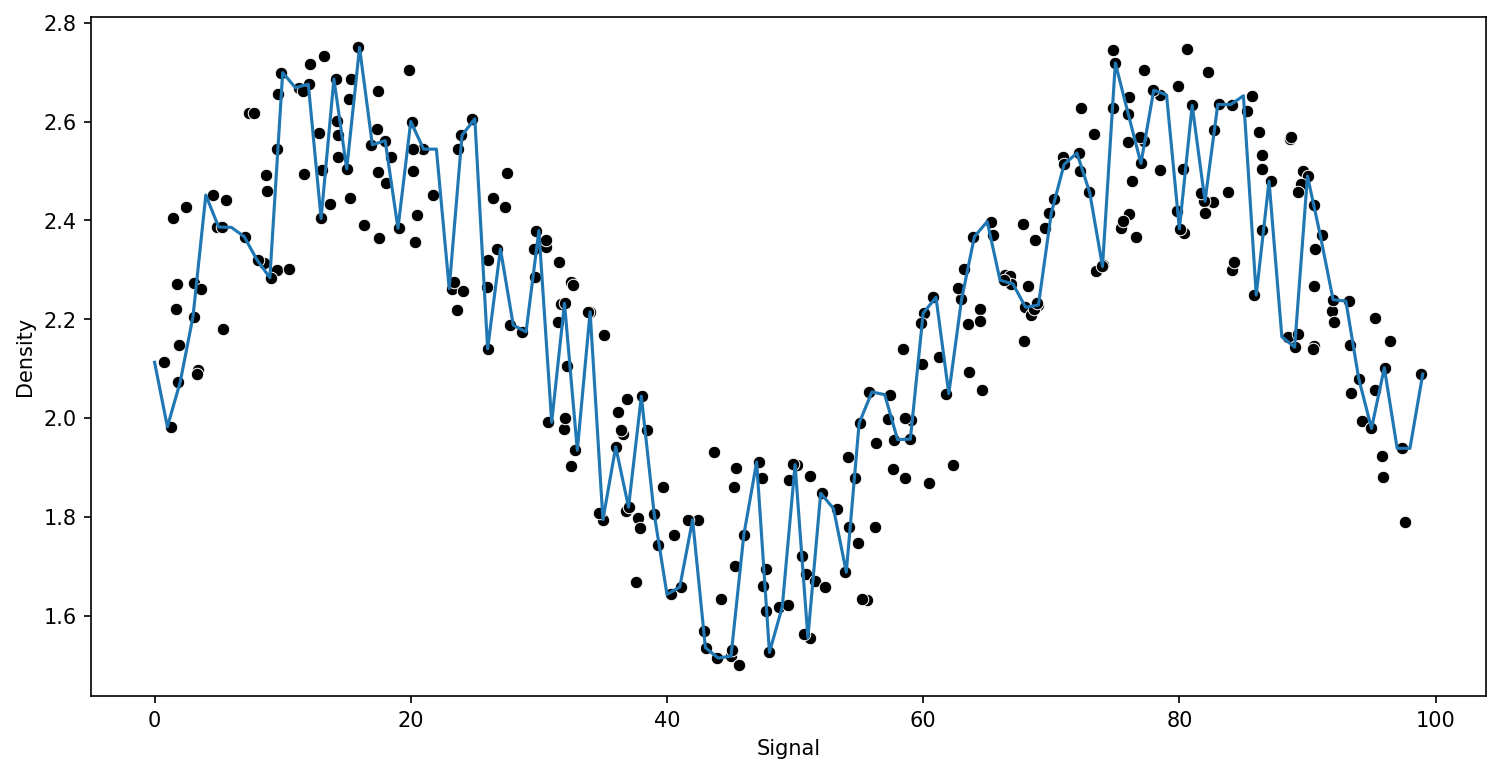

In [276]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [277]:
model.get_n_leaves()

270

----

## Метод опорных векторов для регрессии

In [282]:
from sklearn.svm import SVR

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [285]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12634668775105407


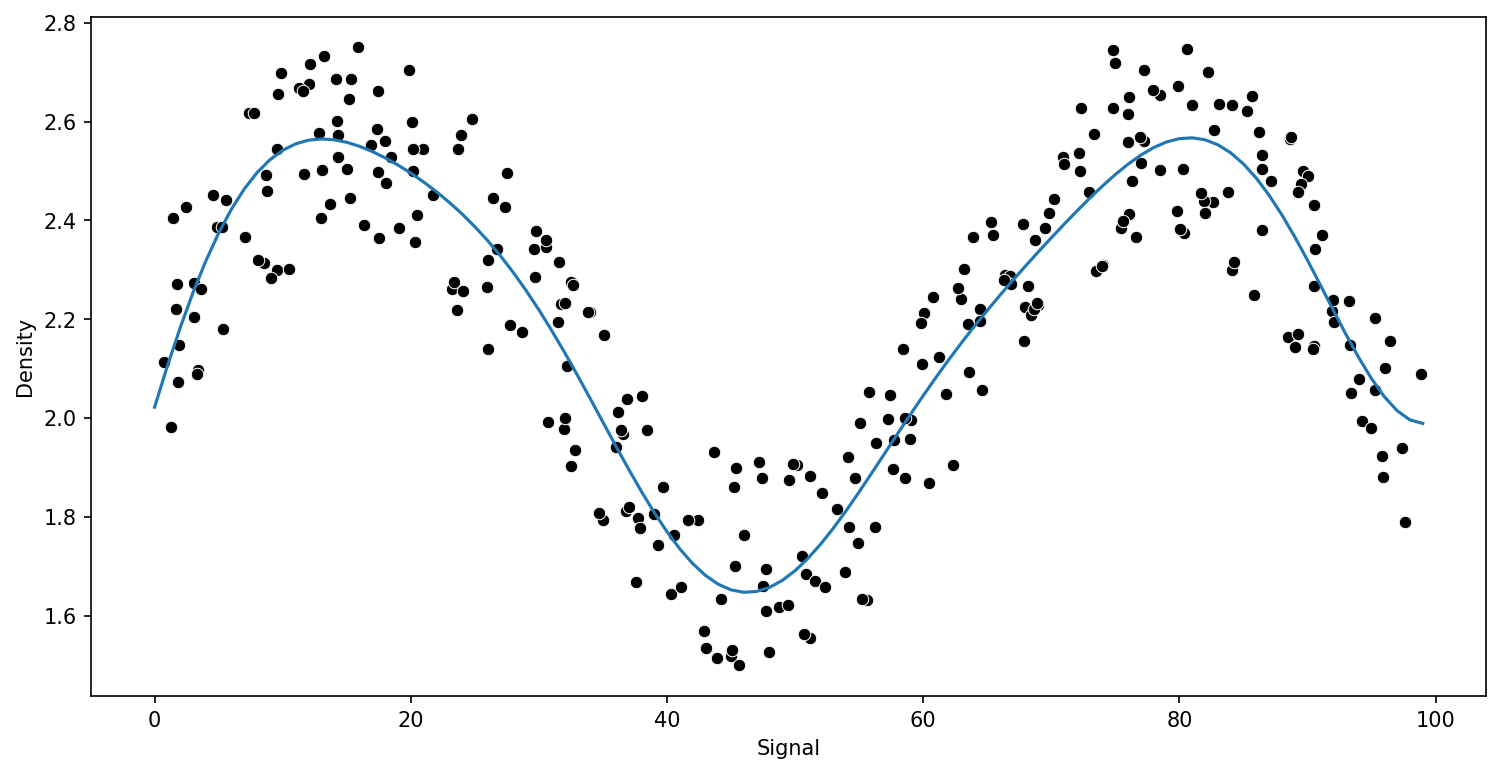

In [286]:
run_model(grid,X_train,y_train,X_test,y_test)

In [287]:
grid.best_estimator_

SVR(C=1000)

---

## Случайные леса для регрессии

In [288]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
# help(RandomForestRegressor)

RMSE : 0.1417613358931285
RMSE : 0.133281449397454
RMSE : 0.13699094997283662


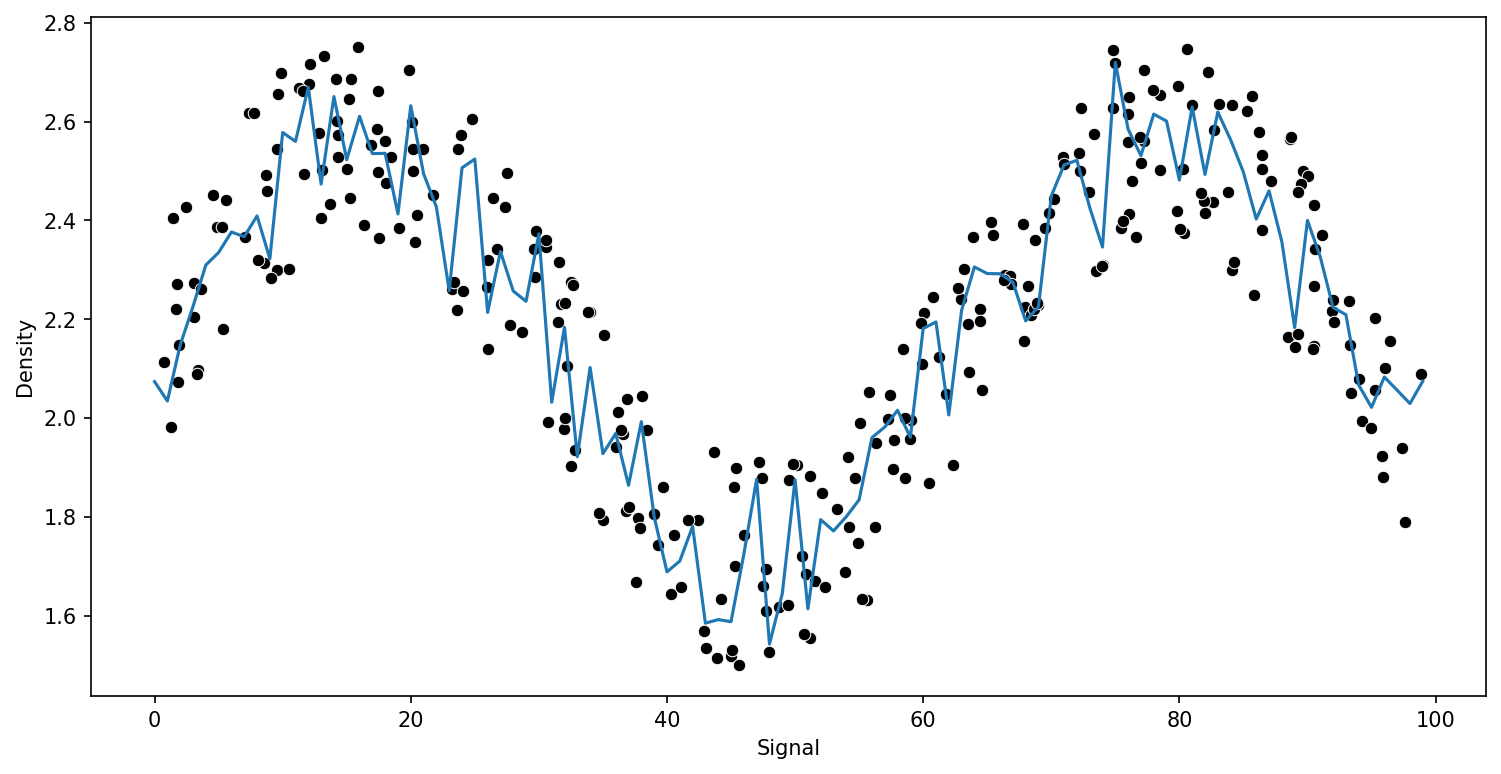

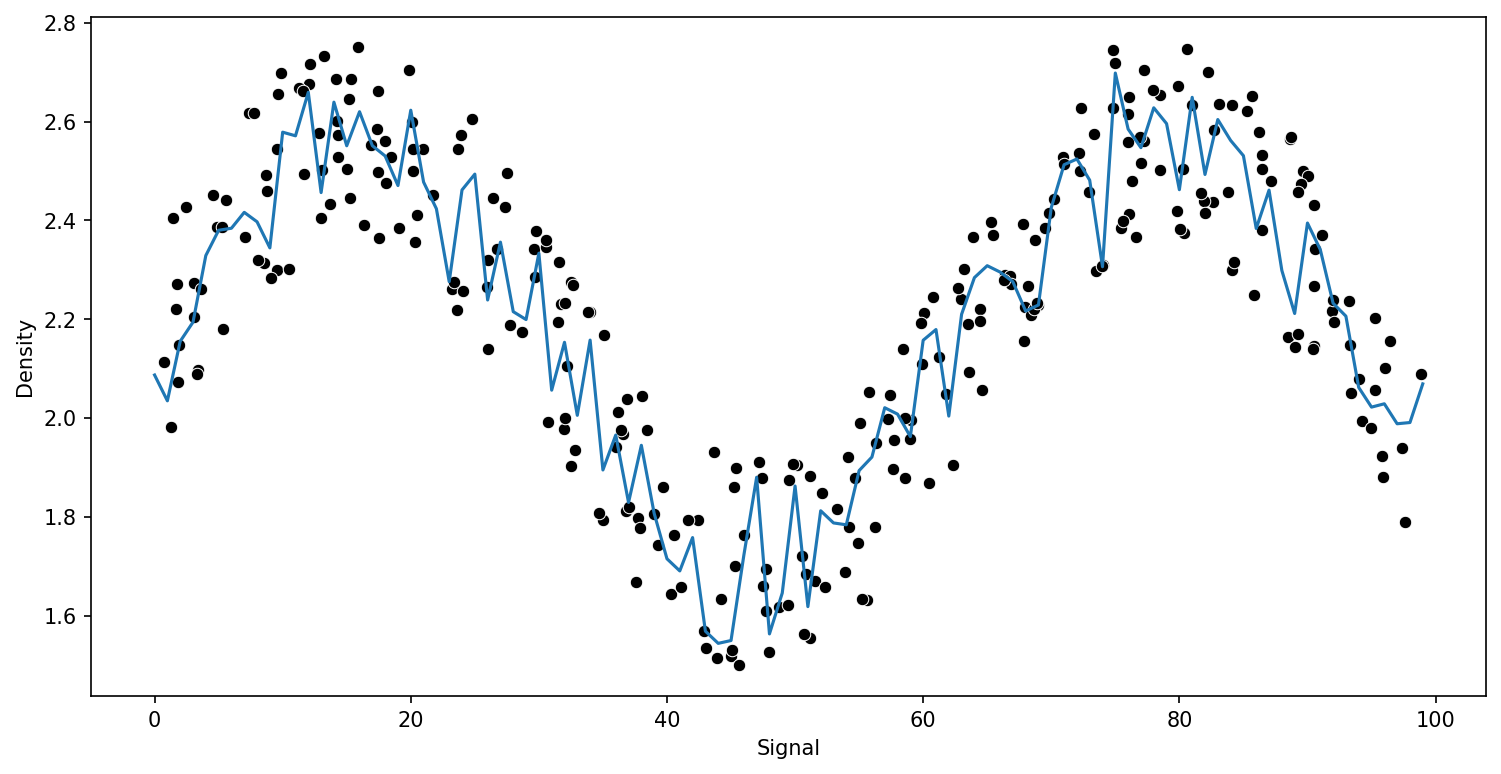

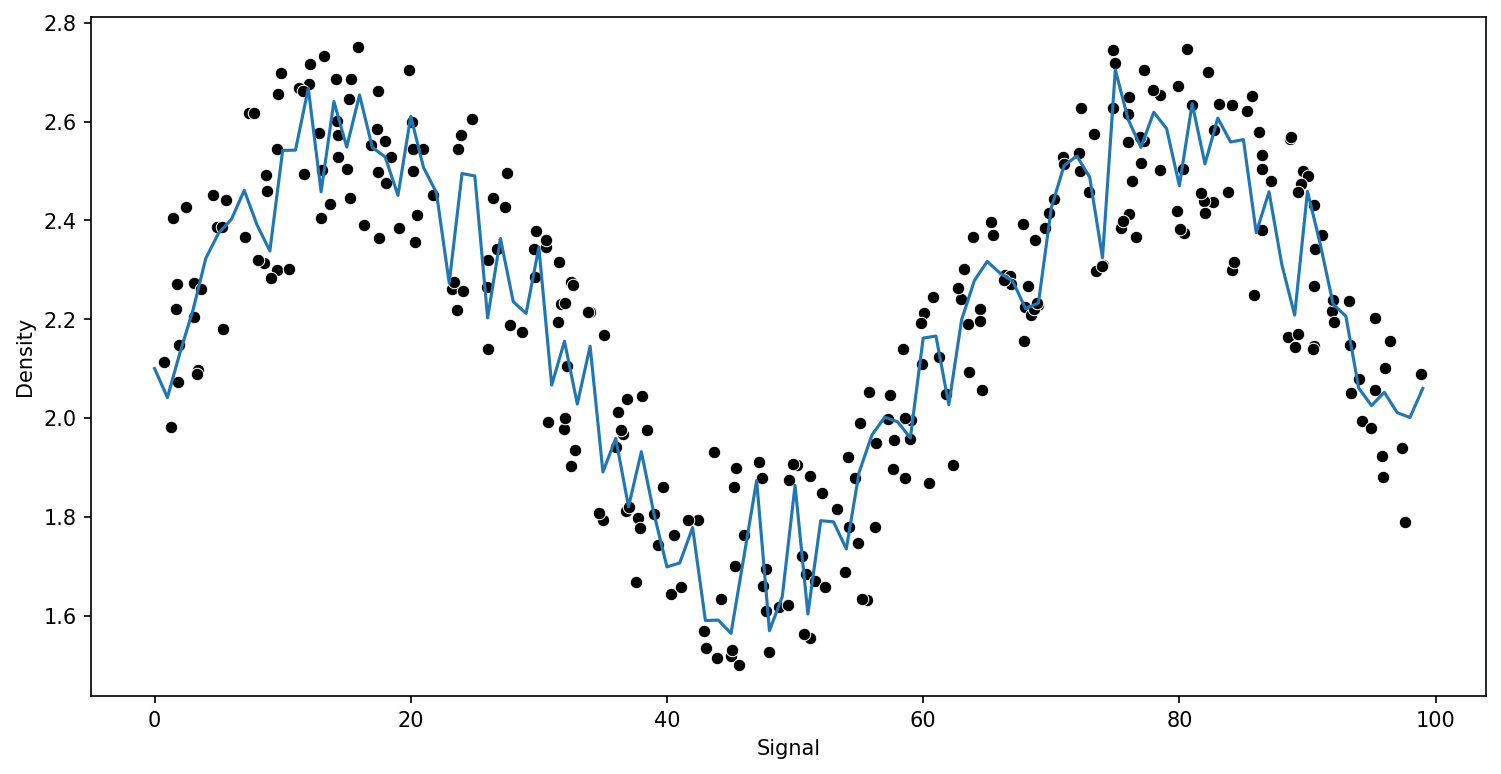

In [290]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Градиентный бустинг

Мы изучим этот метод более подробно в следующем разделе.

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


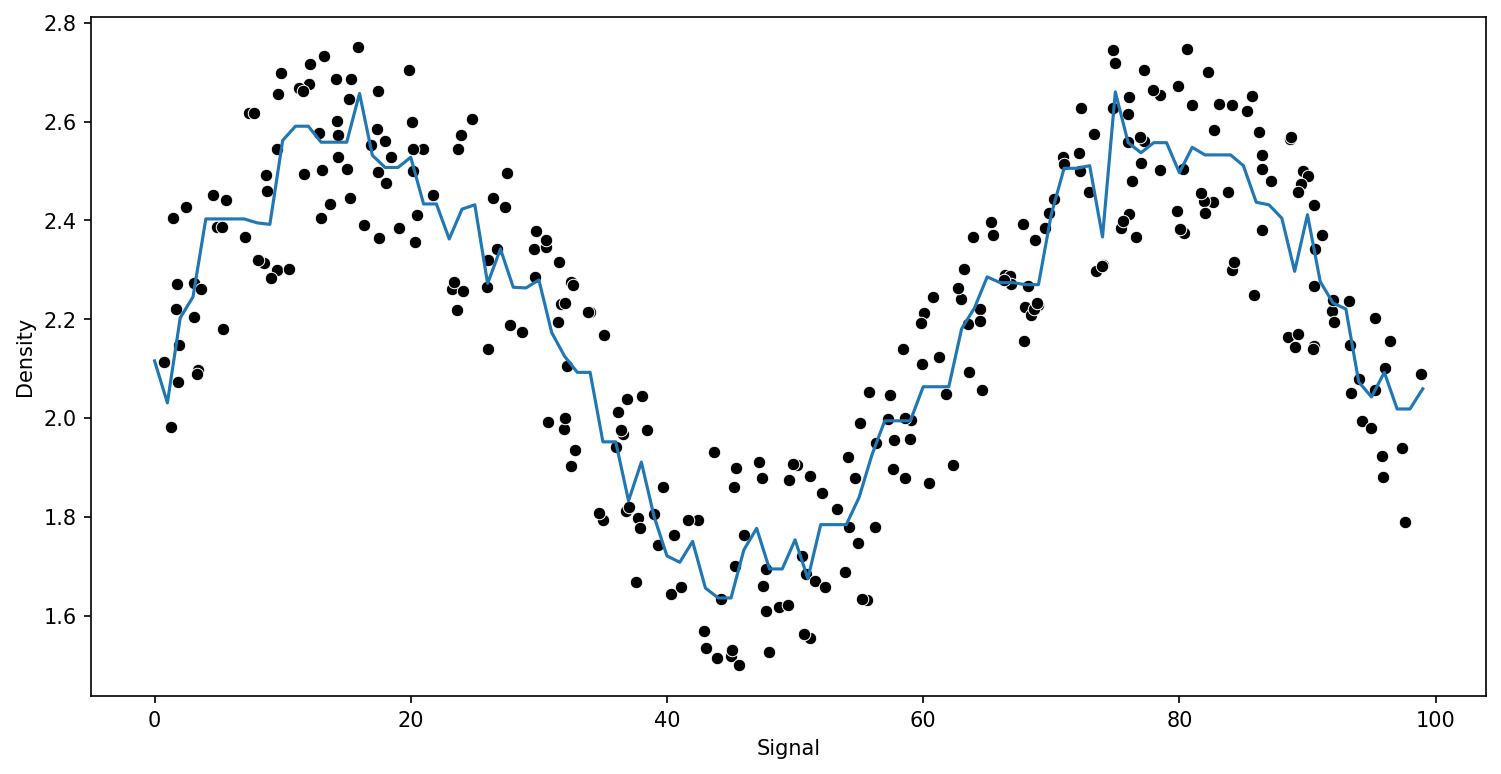

In [293]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [294]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


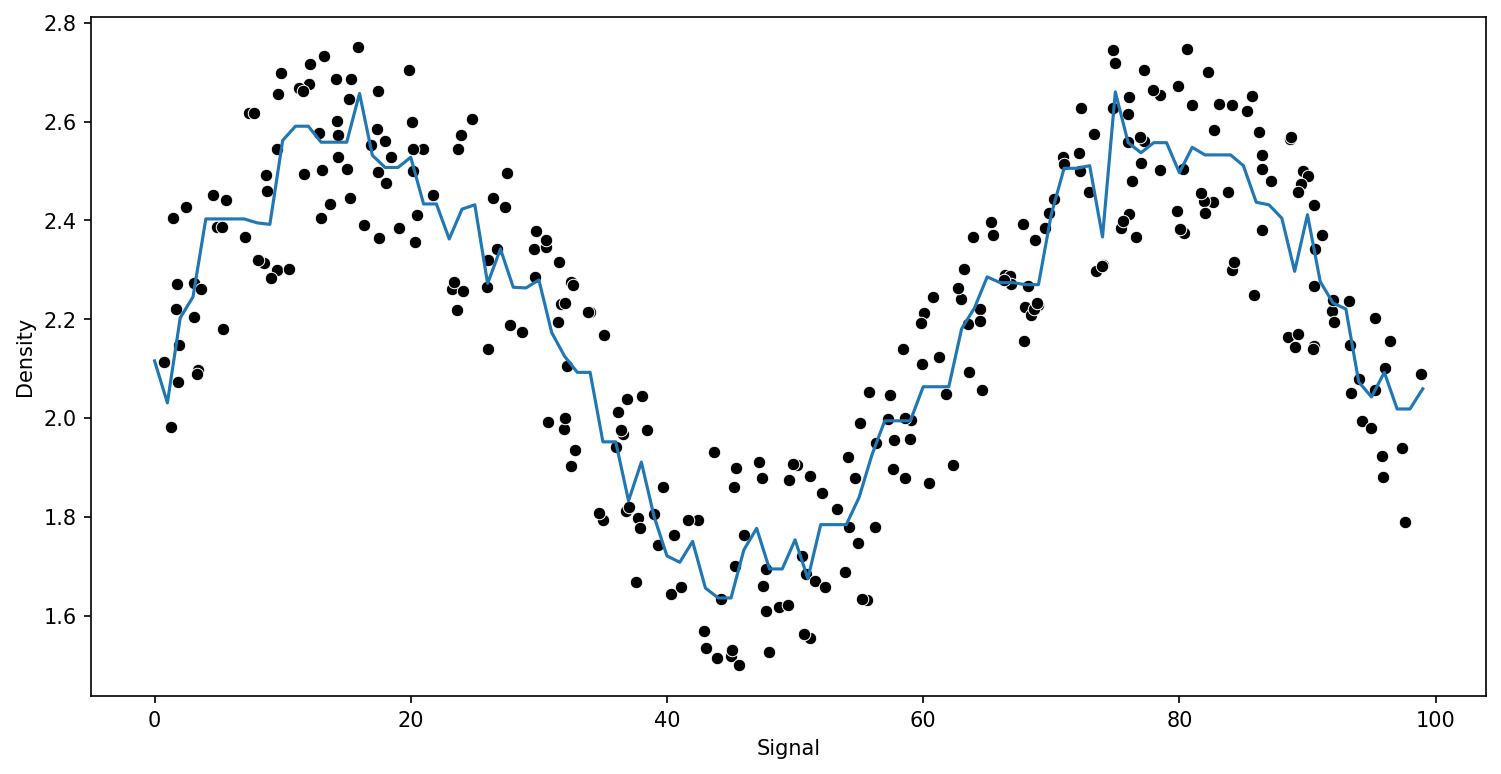

In [295]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----